<a href="https://colab.research.google.com/github/MohanVishe/Supervised-ML--Regression----Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann
## Problem Description
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# Data Description

## Files
Rossman Store Data.csv


# <font color='green'>Data Collection</font>

### IMPORTING

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [35]:
df1=pd.read_csv("/content/drive/MyDrive/Projects/Sample Project/Retail Sales Prediction/Rossmann Stores Data.csv")

In [36]:
df2=pd.read_csv("/content/drive/MyDrive/Projects/Sample Project/Retail Sales Prediction/store.csv")

In [5]:
print("Row and Columns are ", df1.shape)
print("_"*100)
df1.head(5)

Row and Columns are  (1017209, 9)
____________________________________________________________________________________________________


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
print("Row and Columns are ", df2.shape)
print("_"*200)
df2.head(5)

Row and Columns are  (1115, 10)
________________________________________________________________________________________________________________________________________________________________________________________________________


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# <font color='Green'>Data Preprocessing</font>

(https://www.v7labs.com/blog/data-preprocessing-guide)

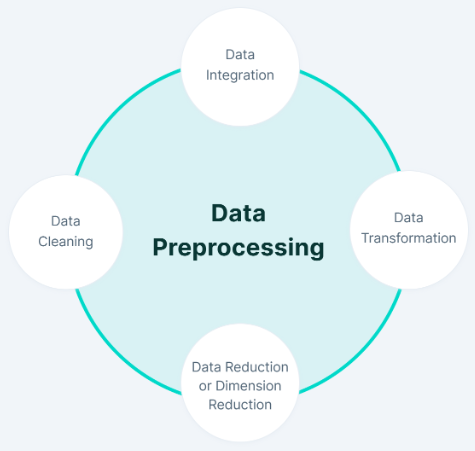

##  <font color='Green'>A. Data Integration</font>

In [6]:
# Using Merge as we want to join the columns with outer join
#(https://pandas.pydata.org/docs/user_guide/merging.html)

Sales = pd.merge(df1,df2, how="outer",on="Store")

In [7]:
print("Number of rows and columns for new dataframe is", Sales.shape)
print("_" * 200)
Sales.head(5)

Number of rows and columns for new dataframe is (1017209, 18)
________________________________________________________________________________________________________________________________________________________________________________________________________


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [8]:
Sales.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


##  Univariated Analysis

In [9]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
Sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


###  <font color='orange'>Insights</font>

* There is presence of null values in dataset
* Categorical as well as numerical data is present in the dataset.

##  <font color='Green'>B. Data Cleaning</font>

### <font color='red'>1. Dealing with Null/Missing values</font>
(https://www.folkstalk.com/tech/find-columns-with-missing-values-pandas-with-code-examples/)


In [10]:
Colm_Miss=list()
for i in Sales.columns:

  # find Precentage of null values presing in features
  
  if Sales[i].isnull().sum() > 0:
    print(i,":",Sales[i].isnull().sum()*100/len(Sales),"%")
    Colm_Miss.append(i)

CompetitionDistance : 0.25973030124586 %
CompetitionOpenSinceMonth : 31.787764363075826 %
CompetitionOpenSinceYear : 31.787764363075826 %
Promo2SinceWeek : 49.94362023930186 %
Promo2SinceYear : 49.94362023930186 %
PromoInterval : 49.94362023930186 %


### <font color='orange'>Insights</font>
---
* There is only one numerica feature `CompetitionDistance` with missing values which contain less than 1% of missing data
* The feature also contain outliers so we will fill the missing value 
with median instead of mean
*  The categorical features `Promo2SinceWeek Promo2SinceYear PromoInterval` contain around 50% of missing data which is very high 
*  So we cant drop the rows we have drop the feature , If the features 
are important we can replace them with mode or make the missing 
value as different category.
* `CompetitionOpenSinceMonth CompetitionOpenSinceYear` this two features have around 31.78 % of missing values.

* For Numerical Data: Replace with <font color='Red'>"Median"</font>

In [11]:
Sales["CompetitionDistance"]=Sales["CompetitionDistance"].fillna(Sales["CompetitionDistance"].median())

In [12]:
Sales["CompetitionDistance"].isnull().any()

False

In [13]:
Colm_Miss.remove("CompetitionDistance")

* For Categorical: Lets <font color='Red'>"Drop"</font>
those columns
(https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/)

In [14]:
Sales.drop(Colm_Miss,axis=1,inplace=True)

In [15]:
#Check for NaN under an entire DataFrame
Sales.isnull().values.any()

False

###  1. Checking Unique values For Categorical Features

In [16]:
#  Seperate numerical and categorical columns
# (https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical)

Colm = set(Sales.columns)
# Numerical data contain Columns 
# (https://www.folkstalk.com/2022/10/pandas-get-numeric-columns-with-code-examples.htmll)
Num_Colm= set(Sales._get_numeric_data())

Cat_Colm= Colm-Num_Colm

print("Categorical Columns are",Cat_Colm)

Categorical Columns are {'Assortment', 'StateHoliday', 'StoreType', 'Date'}


In [17]:
# '\033[91m' for colour red and'\033[0m' to end colour
# (https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python)

for i in list(Cat_Colm-{"Date"}):
  print('\033[91m' , i , '\033[0m')
  print(Sales[i].unique())

 Assortment 
['a' 'c' 'b']
 StateHoliday 
['0' 'a' 'b' 'c' 0]
 StoreType 
['c' 'a' 'd' 'b']


###  <font color='orange'>Insights</font>

---


* For features `"StateHoliday"` the some values 0 are in String format and some are numerical format.
* We have to convert them in same format.

---

 ### <font color='Red'>2. At "StateHoliday" there were some entry of 0 as string and as integer so make them all integer</font>





In [18]:
Sales["StateHoliday"] = Sales["StateHoliday"].replace("0",0)

In [19]:
Sales["StateHoliday"].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [20]:
Cat_Colm_Remain={"DayOfWeek","Promo","Open","Promo2",
  "SchoolHoliday","Store"}

In [21]:
for i in list(Cat_Colm_Remain-{"Store"}):
  print('\033[91m' , i , '\033[0m')
  print(Sales[i].unique())

 SchoolHoliday 
[1 0]
 Open 
[1 0]
 Promo 
[1 0]
 DayOfWeek 
[5 4 3 2 1 7 6]
 Promo2 
[0 1]


### <font color='orange'>Insights</font>
---
* `School holiday,Promo,Promo2, and Open` are binary features which contain value {0,1} where 0 is for fales and 1 is for True
* It seems datapoints are maximum false for `School holiday` and True for 
`Open`
* Datapoints for each `stores,DayOFWeek` are close to uniform distribution
* `Promo2SinceYear` contain values of year 2009 to 2015 and `CompetitionOpenSinceMonth` contain months 
* `Store` is also the categorical feature 
---

 ### <font color='Red'> 3. Removing outliers :</font> Using Boxplot for visualization


### 2.Checking Distribution of Numerical Features





           Customers 


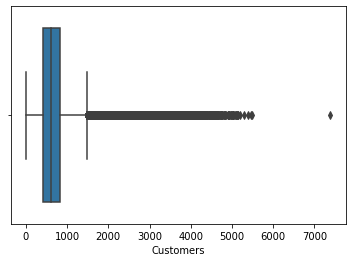

**************************************************
           CompetitionDistance 


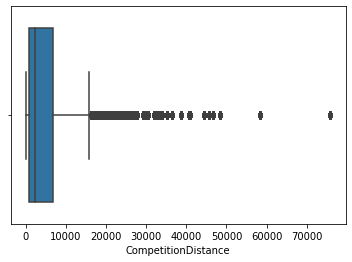

**************************************************
           Sales 


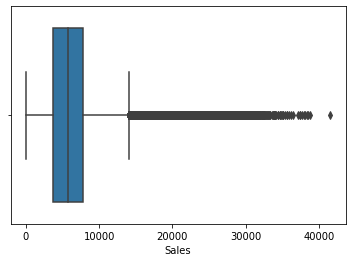

**************************************************


In [ ]:
for i in list(Num_Colm-Cat_Colm_Remain):
  print('          \033[91m' , i , '\033[0m')  
  sns.boxplot(x=i,data=Sales)
  plt.show()
  print("*"* 50)

In [ ]:
# number of values of Customers greater than 5200
len(Sales["Customers"])-len(Sales[Sales["Customers"]<4000])

319

In [ ]:
# number of values of CompetitionDistance greater than 5000
len(Sales["CompetitionDistance"])-len(Sales[Sales["CompetitionDistance"]<50000])

1884

In [ ]:
# number of values of Sales greater than 38000
len(Sales["Sales"])-len(Sales[Sales["Sales"]<30000])

153

In [ ]:
Sales[Sales["CompetitionDistance"]>50000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
110486,122,5,2015-07-31,12336,1327,1,1,0,1,a,c,58260.0,0
110487,122,4,2015-07-30,10576,1163,1,1,0,1,a,c,58260.0,0
110488,122,3,2015-07-29,11446,1264,1,1,0,1,a,c,58260.0,0
110489,122,2,2015-07-28,12205,1376,1,1,0,1,a,c,58260.0,0
110490,122,1,2015-07-27,14461,1611,1,1,0,1,a,c,58260.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413473,453,6,2013-01-05,5598,651,1,0,0,0,a,c,75860.0,0
413474,453,5,2013-01-04,5789,689,1,0,0,1,a,c,75860.0,0
413475,453,4,2013-01-03,6109,740,1,0,0,1,a,c,75860.0,0
413476,453,3,2013-01-02,8265,989,1,0,0,1,a,c,75860.0,0


In [22]:
Sales.drop(Sales[(Sales["Sales"] > 30000) | (Sales["CompetitionDistance"] >50000) | (Sales["Customers"] > 4000)].index , inplace=True)

In [ ]:
len(Sales[(Sales["Sales"] > 30000) | (Sales["CompetitionDistance"] >50000) | (Sales["Customers"] > 4000)])

0

##  <font color='Green'>C. Data Transformation </font>

### Checking Distribution

           Customers 


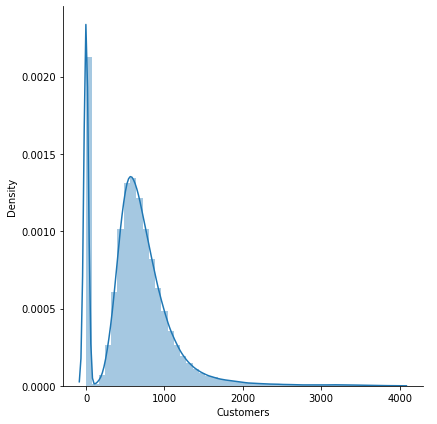

************************************************************
           CompetitionDistance 


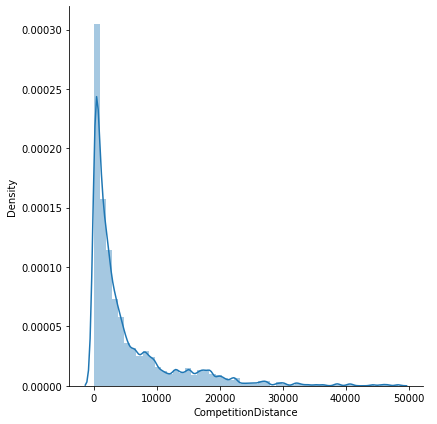

************************************************************
           Sales 


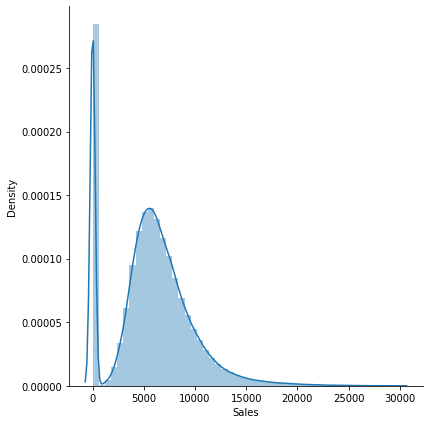

************************************************************


In [ ]:
for i in list(Num_Colm-Cat_Colm_Remain):
  print('          \033[91m' , i , '\033[0m')
  
  sns.FacetGrid(Sales,size=6)\
    .map(sns.distplot,i)\
    .add_legend(); 
  
  plt.show()
  print("*"*60)

### <font color='orange'>Insights</font>
---
* The numberical features are not showing normal distribution 
* We have to try feature transformation 
* From Box plot we can see that there is presence of outliers in 
the data 
---

####  1. Apply log transformation to `CompetitionDistance`

Text(0.5, 1.0, 'Log-Transformed')

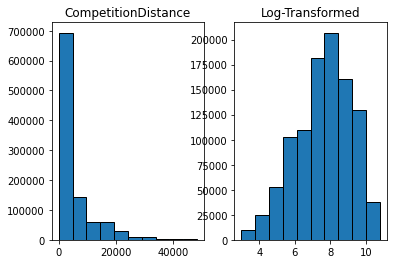

In [ ]:
# (https://www.statology.org/transform-data-in-python/)


#create log-transformed data
data_log = np.log(Sales["CompetitionDistance"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["CompetitionDistance"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('CompetitionDistance')
axs[1].set_title('Log-Transformed')


In [ ]:
Sales["CompetitionDistance"]= np.log(Sales["CompetitionDistance"])

####  2. Apply Square root transformation to `Customers`

Text(0.5, 1.0, 'SQRT transform')

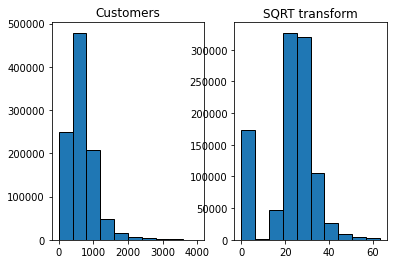

In [ ]:
#create log-transformed data
data_log = np.sqrt(Sales["Customers"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["Customers"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('Customers')
axs[1].set_title('SQRT transform')


In [ ]:
Sales["Customers"]= np.sqrt(Sales["Customers"])

####  3. Apply Square root transformation to `Sales`

Text(0.5, 1.0, 'SQRT transform')

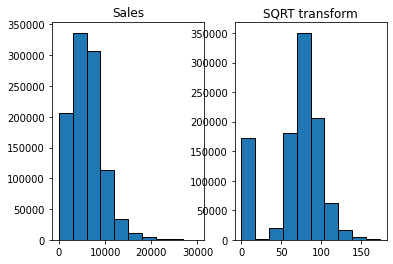

In [ ]:
#create log-transformed data
data_log = np.sqrt(Sales["Sales"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["Sales"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('Sales')
axs[1].set_title('SQRT transform')

In [ ]:
Sales["Sales"]= np.sqrt(Sales["Sales"])

### Transformed Data

           CompetitionDistance 


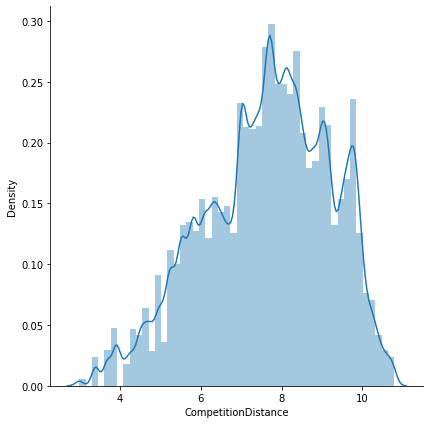

************************************************************
           Sales 


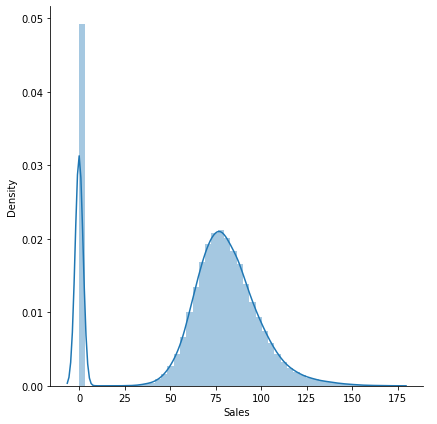

************************************************************
           Customers 


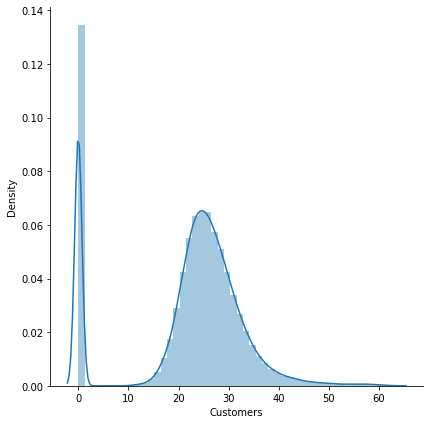

************************************************************


In [ ]:
for i in list(Num_Colm-Cat_Colm_Remain):
  print('          \033[91m' , i , '\033[0m')
  
  sns.FacetGrid(Sales,size=6)\
    .map(sns.distplot,i)\
    .add_legend(); 
  
  plt.show()
  print("*"*60)

## Multivariated Analysis

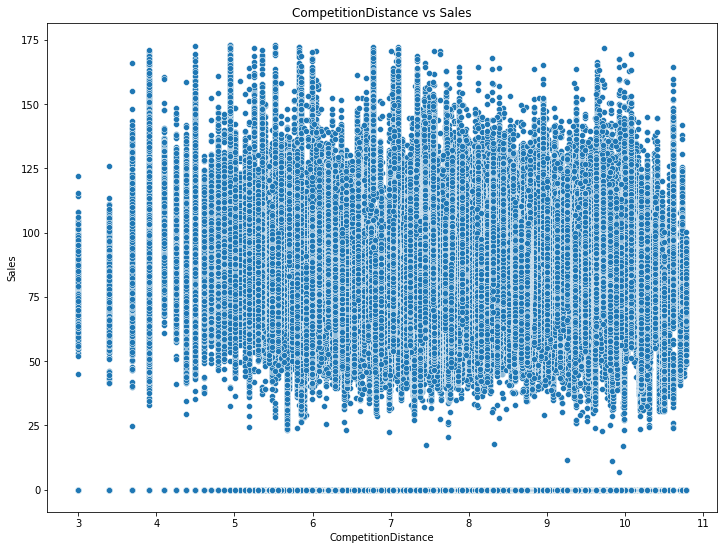

In [ ]:
plt.figure(figsize = (12,9))
sns.scatterplot(data=Sales,x="CompetitionDistance",y="Sales")
plt.title("CompetitionDistance vs Sales")
plt.show()

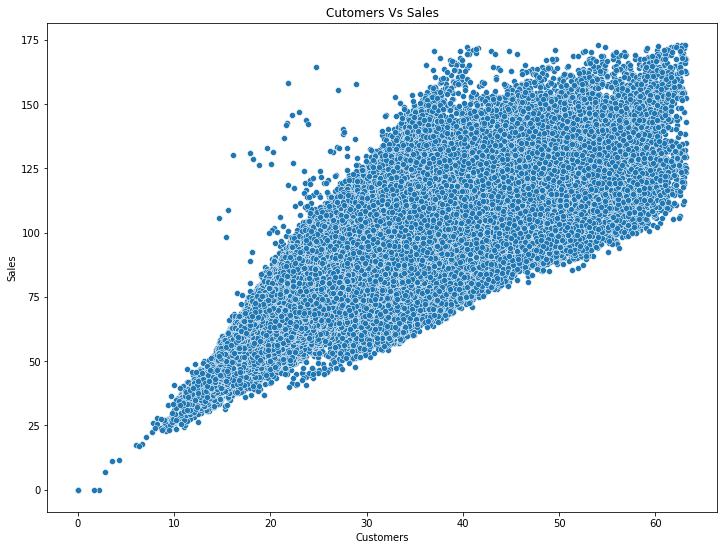

In [ ]:
plt.figure(figsize = (12,9))
sns.scatterplot(data=Sales,x="Customers",y="Sales")
plt.title("Cutomers Vs Sales")
plt.show()

### 3. Correlation Between Features 

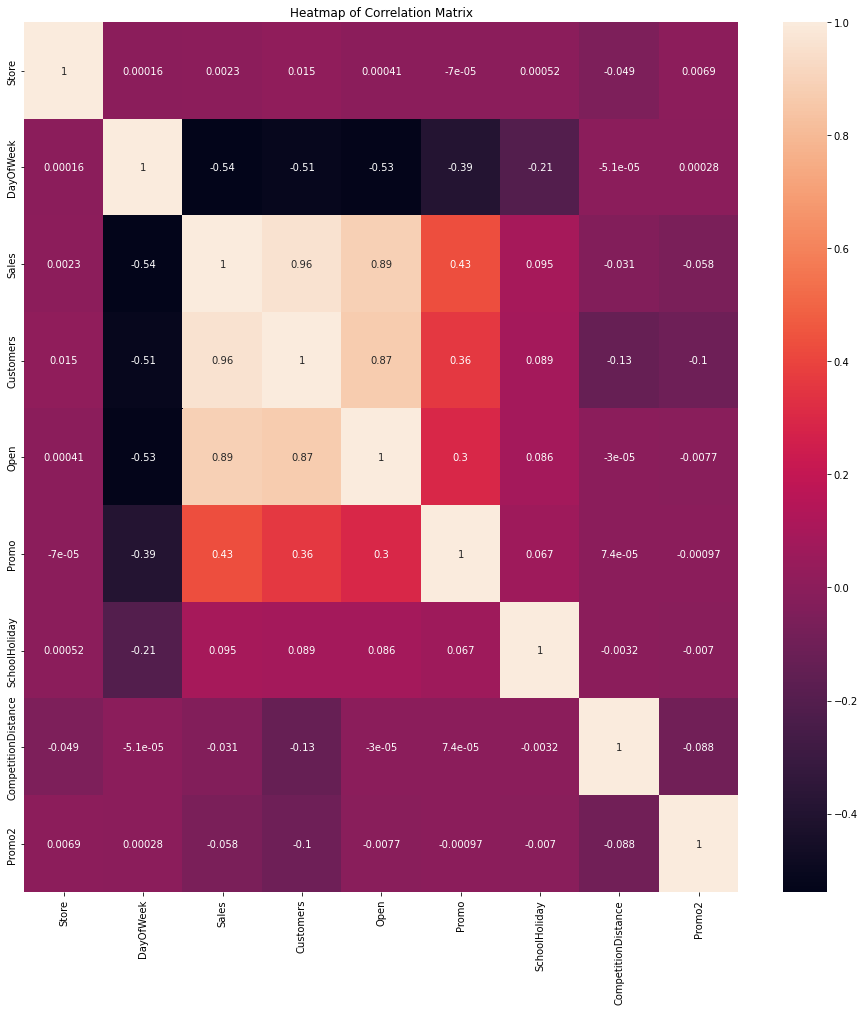

In [ ]:
# Increase figure size so it would be understandable
plt.figure(figsize = (16,16))

#correlation matrix
CM=Sales.corr() 
sns.heatmap(CM,annot=True) 
plt.title("Heatmap of Correlation Matrix") 
plt.show()

### <font color='orange'>Insights</font>
---
* `Customers,Sales,Open,Promo,DayOfWeek` are high and positively correlated with each other which is understandable
* There is no high correlation between other features.
---

In [23]:
# Appling one hot encoding (Using get_dummies approach)
# (https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)

Sales=pd.get_dummies(Sales,columns=['StateHoliday', 'Assortment',"StoreType" ])
Sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d'],
      dtype='object')

In [ ]:
Sales.shape

(1014954, 21)

### Train and Test Data (Random Splitting)

In [24]:
X=Sales[list(set(Sales.columns)-{"Sales","Date"})]
Y=Sales["Sales"]

In [25]:
# To split the data with 20% of data in test
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2022)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [27]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
Ypred=regressor.predict(X_test)

In [30]:
r2 = r2_score(y_test, Ypred)
print(r2)

0.8998647181004586
